<a href="https://colab.research.google.com/github/WoojinJeonkr/Data-Analysis/blob/main/Model_Diagnosis_and_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모형 진단과 수정
- 회귀분석 결과의 진단: 회귀분서에 사용된 데이터가 회귀분석에 사용된 모형 가정을 제대로 만족하고 있는지 확인하는 과정

## 잔차 정규성
- 데이터가 모형 가정을 만족하면 분석결과로 나온 잔차는 정규분포를 따라야 한다

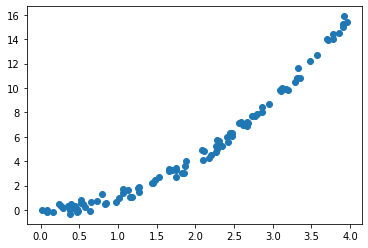

In [1]:
# 2차 비선형 관계를 가지는 데이터를 선형 모형으로 회귀분석
import numpy as np
import matplotlib.pyplot as plt

def make_regression2(n_sample=100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.show()

In [2]:
import statsmodels.api as sm
import pandas as pd

dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


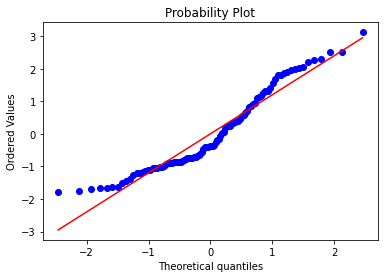

In [3]:
import scipy as sp

sp.stats.probplot(result2.resid, plot=plt)
plt.show()

In [4]:
test = sm.stats.omni_normtest(result2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  9.520
P-value     :  0.009


## 잔차와 독립 변수의 관계

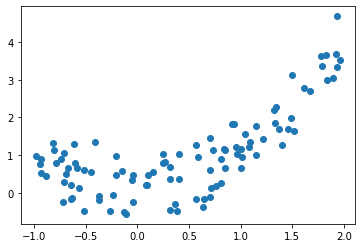

In [5]:
def make_regression3(n_sample=100, bias=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y


x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

In [6]:
dfX30 = pd.DataFrame(x3, columns=["X1"])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=["y"])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


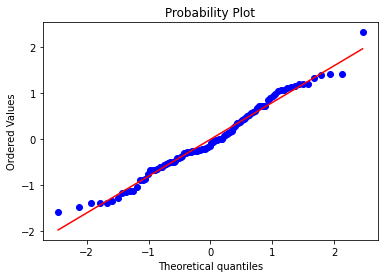

In [7]:
sp.stats.probplot(result3.resid, plot=plt)
plt.show()

In [8]:
test = sm.stats.omni_normtest(result3.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  1.202
P-value     :  0.548


In [9]:
## 데이터가 모형 가정을 따르지 않음
## 하지만 잔차는 정규분포를 따름
## ==> 이러한 경우 잔차와 독립 변수 간의 관계를 살펴보는 것이 도움이 될 수 있음
## 데이터가 올바른 모형으로 분석된다면 잔차는 독립변수와 상관관계를 가지지 않아야 함
## 잔차와 특정 독립 변수 간의 관계는 전체 모형이 올바른 모형이 아니라는 것을 알려줄 뿐
## 어떤 모형이 올바른 모형인지에 대한 정보는 주지 않음

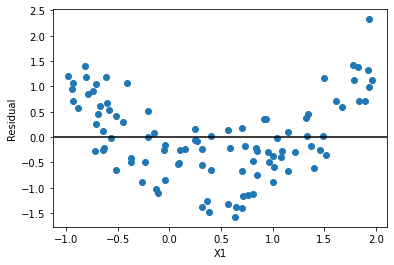

In [10]:
plt.plot(x3, result3.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

## 이분산성
- 실제 데이터는 독립 변수 값의 크기가 커지면 종속 변수 값의 분산도 커지는 문제
- 종속변수를 로그 변환한 트랜스로그 모형을 사용하면 이분산성 문제가 해결되는 경우도 있음

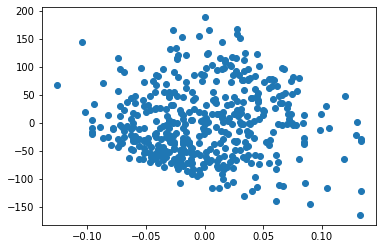

In [11]:
from sklearn.datasets import load_diabetes
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns=["target"])],
               axis=1)
model = sm.OLS.from_formula("target ~ x9", data=df)
result = model.fit()
plt.scatter(df["x9"], result.resid)
plt.show()

## 자기 상관 계수
- 오차가 독립인지 검정하는 방법은 잔차를 시계열로 가정하여 자기상관계수를 구하는 것
- 만약 독립이라면 시차(lag)가 0인 경우를 제외하고는 자기상관계수가 0이어야 한다
- 이를 검사하는 검증
> Box-Pierce 검정   
> Ljung-Box 검정   
> Durbin-Watson 검정   
- 위의 검정들은 $$H0:ρl=0 for i=1,2,⋯,l$$와 같은 귀무 가설을 검증한다


### 비선형 변형
- 만약 독립변수와 종속변수간의 관계가 비선형이면 이 관계를 선형으로 바꿀 수 있도록 독립변수를 비선형 변환할 수 있다

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

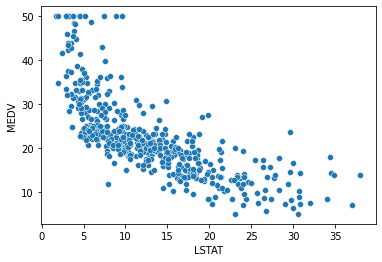

In [12]:
from sklearn.datasets import load_boston
import seaborn as sns

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)

sns.scatterplot(x="LSTAT", y="MEDV", data=df_boston)
plt.show()

In [13]:
## 보스턴 집값 데이터에서 집값과 LSTAT 데이터 >> 비선형 관계

In [14]:
# 그냥 사용하여 LSTAT과 종속변수간의 선형모형을 구한 결과

model1 = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_boston)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           5.08e-88
Time:                        14:55:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

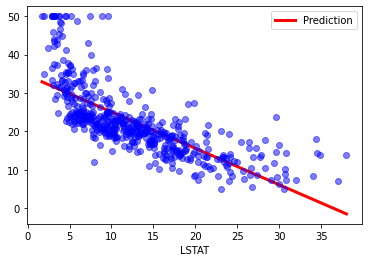

In [15]:
# 예측값과 실제 데이터 비교

y_hat1 = result1.predict(df_boston)
df1 = pd.concat([y_hat1, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df1.columns = ["Prediction", "LSTAT"]
df1.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()

In [16]:
# 위 그림에서 선형 모형이 적합하지 않다는 것을 알 수 있다

In [17]:
# LSTAT값을 제곱한 비선형 독립변수를 추가하여
# LSTAT과 종속변수간의 선형모형을 구한 결과

model2 = sm.OLS.from_formula("MEDV ~ LSTAT + I(LSTAT**2)", data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          1.56e-112
Time:                        14:55:48   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

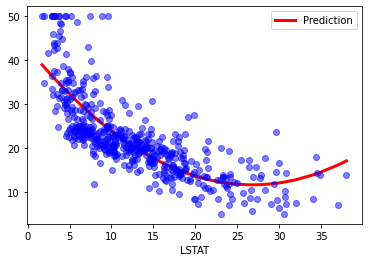

In [18]:
# 실제 데이터와 예측값 비교

y_hat2 = result2.predict(df_boston)
df2 = pd.concat([y_hat2, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df2.columns = ["Prediction", "LSTAT"]
df2.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()

### 범주형을 사용한 비선형성
- 독립변수의 비선형성을 포착하는 또 다른 방법 중 하나는 강제로 범주형 값으로 만드는 것
- 범주형 값이 되면서 독립변수의 오차가 생기지만 이로 인한 오차보다 비선형성으로 얻을 수 있는 이익이 클 수도 있음
- 보스턴 집값 데이터에서 종속변수와 RM 변수의 관계는 선형에 가깝지만 방의 갯수가 아주 작아지거나 아주 커지면 선형모형에서 벗어남

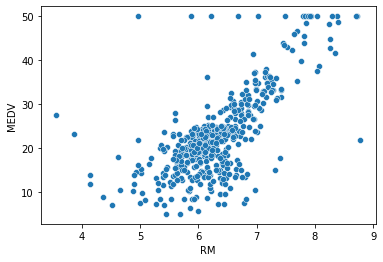

In [19]:
sns.scatterplot(x="RM", y="MEDV", data=df_boston)
plt.show()

In [20]:
model3 = sm.OLS.from_formula("MEDV ~ RM", data=df_boston)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           2.49e-74
Time:                        14:55:48   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

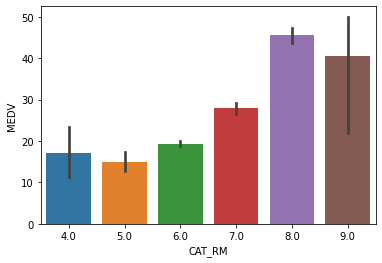

In [21]:
# 카테고리값으로 변한 RM 변수와 종속변수의 관계 시각화

rooms = np.arange(3, 10)
labels = [str(r) for r in rooms[:-1]]
df_boston["CAT_RM"] = np.round(df_boston.RM)

sns.barplot(x="CAT_RM", y="MEDV", data=df_boston)
plt.show()

In [22]:
# RM 변수으로 인한 종속변수의 변화를 비선형 상수항으로 모형화

model4 = sm.OLS.from_formula("MEDV ~ C(np.round(RM))", data=df_boston)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           3.57e-81
Time:                        14:55:48   Log-Likelihood:                -1645.6
No. Observations:                 506   AIC:                             3303.
Df Residuals:                     500   BIC:                             3329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 17

### 시간 독립변수의 변형
- 독립변수가 시간인 경우에는 특정 시점에서 경과된 시간값으로 변형

In [23]:
# 일간 전기 사용량 데이터

data = sm.datasets.get_rdataset("elecdaily", package="fpp2")

df_elec = data.data.drop(columns=["WorkDay", "Temperature"])
df_elec["Date"] = pd.date_range("2014-1-1", "2014-12-31")
df_elec.tail()

,Demand,Date
360,173.727990,2014-12-27
361,188.512817,2014-12-28
362,191.273009,2014-12-29
363,186.240144,2014-12-30
364,186.370181,2014-12-31


In [24]:
import datetime as dt

df_elec["Ordinal"] = df_elec.Date.map(dt.datetime.toordinal)
df_elec["Timestamp"] = df_elec.Date.map(dt.datetime.timestamp)
df_elec.tail()

,Demand,Date,Ordinal,Timestamp
360,173.727990,2014-12-27,735594,1.419638e+09
361,188.512817,2014-12-28,735595,1.419725e+09
362,191.273009,2014-12-29,735596,1.419811e+09
363,186.240144,2014-12-30,735597,1.419898e+09
364,186.370181,2014-12-31,735598,1.419984e+09


In [25]:
# 일단위 시간 값을 사용하여 회귀분석
# 시간 값의 경우 크기가 크므로 반드시 스케일링 필요

model5 = sm.OLS.from_formula("Demand ~ scale(Ordinal)", data=df_elec)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           0.000739
Time:                        14:55:50   Log-Likelihood:                -1709.7
No. Observations:                 365   AIC:                             3423.
Df Residuals:                     363   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        221.2775      1.374    160.

In [26]:
# 판다스에서 dt 특수 연산자를 사용하여 시간 독립변수의 다양한 특징 값 구하기

df_elec["Year"] = df_elec.Date.dt.year
df_elec["Month"] = df_elec.Date.dt.month
df_elec["DayOfYear"] = df_elec.Date.dt.dayofyear
df_elec["DayOfMonth"] = df_elec.Date.dt.daysinmonth
df_elec["DayOfWeek"] = df_elec.Date.dt.dayofweek
df_elec["WeekOfYear"] = df_elec.Date.dt.weekofyear
df_elec["Weekday"] = df_elec.Date.dt.weekday
df_elec["IsMonthStart"] = df_elec.Date.dt.is_month_start
df_elec["IsMonthEnd"] = df_elec.Date.dt.is_month_end
df_elec.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Demand,Date,Ordinal,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekOfYear,Weekday,IsMonthStart,IsMonthEnd
360,173.727990,2014-12-27,735594,1.419638e+09,2014,12,361,31,5,52,5,False,False
361,188.512817,2014-12-28,735595,1.419725e+09,2014,12,362,31,6,52,6,False,False
362,191.273009,2014-12-29,735596,1.419811e+09,2014,12,363,31,0,1,0,False,False
363,186.240144,2014-12-30,735597,1.419898e+09,2014,12,364,31,1,1,1,False,False
364,186.370181,2014-12-31,735598,1.419984e+09,2014,12,365,31,2,1,2,False,True


In [27]:
# 추가적인 특징값을 이용하여 구한 모형

feature_names = df_elec.columns.tolist()
feature_names.remove("Demand")
feature_names.remove("Date")

formula = """
Demand ~ scale(Ordinal) + C(Month) + DayOfYear + 
         C(DayOfMonth) + C(DayOfWeek) + C(Weekday) + C(IsMonthStart) + C(IsMonthEnd)
"""
model6 = sm.OLS.from_formula(formula, data=df_elec)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.98
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           4.74e-46
Time:                        14:55:50   Log-Likelihood:                -1574.8
No. Observations:                 365   AIC:                             3192.
Df Residuals:                     344   BIC:                             3273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

### 주기성을 가지는 독립변수
- 독립변수가 주기성을 가지는 경우 그대로 사용하면 모형이 주기성을 가지지 못함

In [28]:
# scikit-learn의 covtype 데이터

from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()

feature_names = ["Aspect", "Hillshade_9am"]
df_covtype = pd.DataFrame(covtype.data[:, [1, 6]], columns=feature_names)
df_covtype = df_covtype.sample(10000, random_state=0)  # 편의상 10,000개 표본 추출
df_covtype.tail()

,Aspect,Hillshade_9am
77297,90.0,235.0
103214,38.0,220.0
459385,79.0,241.0
159359,58.0,225.0
565783,91.0,240.0


In [29]:
## Aspect라는 변수를 독립변수로 하고 Hillshade_9am라는 변수를 종속변수로 하는 회귀분석 문제로 가정

In [30]:
## Aspect 변수는 도(degree) 단위의 각도를 나타내는 독립변수이므로 
## 0부터 360까지의 값을 가짐
## Aspect가 0인 경우와 360인 경우는 독립변수가 실질적으로 같아
## 같은 종속변수 값을 예측해야 한다

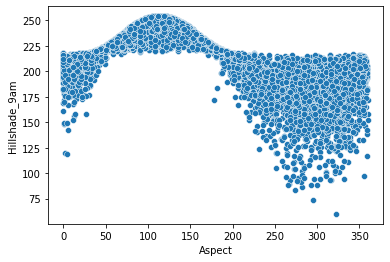

In [31]:
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.show()

In [32]:
# Aspect를 일반 실수형 독립변수처럼 사용 시 0도와 360도일 경우 다른 종속변수값 예측

model7 = sm.OLS.from_formula(
    "Hillshade_9am ~ Aspect + I(Aspect**2) + I(Aspect**3)", 
    data=df_covtype
)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:          Hillshade_9am   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     7974.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:55:52   Log-Likelihood:                -40905.
No. Observations:               10000   AIC:                         8.182e+04
Df Residuals:                    9996   BIC:                         8.185e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        187.0395      0.485    385.

In [33]:
df_test = pd.DataFrame([[0], [360]], columns=["Aspect"])
df_result7 = result7.predict(df_test)
df_result7

0    187.039453
1    193.002560
dtype: float64

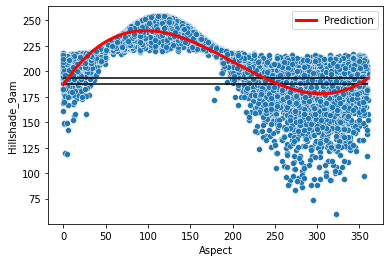

In [34]:
y_hat7 = result7.predict(df_covtype)
df7 = pd.concat([y_hat7, df_covtype.Aspect], axis=1).sort_values("Aspect")
df7.columns = ["Prediction", "Aspect"]
df7.plot(x="Aspect", style="r-", lw=3)
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.hlines(df_result7.values[0], 0, 360)
plt.hlines(df_result7.values[1], 0, 360)
plt.show()

In [35]:
## 이를 방지하기 위해 일반적으로 주기성을 띄는 독립변수는
## 다음처럼 두 개의 독립변수로 분리한다

$$x1=cos(2π/360*x)$$
$$x2=sin(2π/360*x)$$

In [36]:
f = 2.0 * np.pi / 360

model8 = sm.OLS.from_formula("""
Hillshade_9am ~ 
np.cos(f * Aspect) +
np.sin(f * Aspect)
""", data=df_covtype
)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:          Hillshade_9am   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.334e+04
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:55:53   Log-Likelihood:                -40515.
No. Observations:               10000   AIC:                         8.104e+04
Df Residuals:                    9997   BIC:                         8.106e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            208.8444      0

In [37]:
## 이제 독립변수의 특징을 유지하며 모형이 주기성을 가짐

In [38]:
df_result8 = result8.predict(df_test)
df_result8

0    196.069868
1    196.069868
dtype: float64

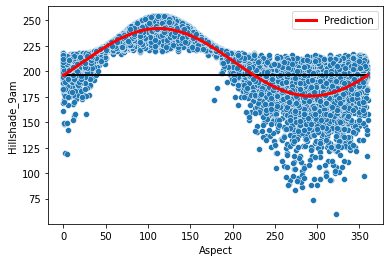

In [39]:
y_hat8 = result8.predict(df_covtype)
df8 = pd.concat([y_hat8, df_covtype.Aspect], axis=1).sort_values("Aspect")
df8.columns = ["Prediction", "Aspect"]
df8.plot(x="Aspect", style="r-", lw=3)
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.hlines(df_result8.values[0], 0, 360)
plt.hlines(df_result8.values[1], 0, 360)
plt.show()

In [40]:
# 한글 설정

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

### 종속변수 변형

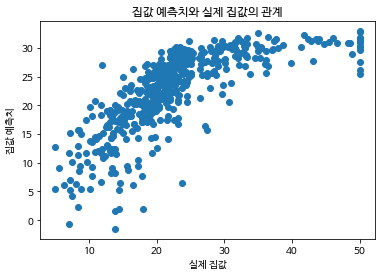

In [42]:
# LSTAT 독립변수로 보스턴 집값을 예측하는 선형회귀모형의 예측값과 실제값

plt.rc('font', family='NanumBarunGothic')
plt.scatter(boston.target, y_hat1)
plt.xlabel(u"실제 집값")
plt.ylabel(u"집값 예측치")
plt.title("집값 예측치와 실제 집값의 관계")
plt.show()

In [43]:
## 모형이 올바르다면 예측치와 실제 종속변수값을 그린
## 스캐터 플롯은 선형적인 모습이 나와야 함
## 하지만 실제로는 제곱근이나 로그 그래프와 더 유사
## 이러한 경우에는 이 스캐터 플롯을 선형적으로 만들어 주도록 예측치를 비선형 변환

In [44]:
model11 = sm.OLS.from_formula("np.sqrt(MEDV) ~ LSTAT", data=df_boston)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:          np.sqrt(MEDV)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     789.7
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          3.09e-105
Time:                        14:57:28   Log-Likelihood:                -445.65
No. Observations:                 506   AIC:                             895.3
Df Residuals:                     504   BIC:                             903.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9499      0.053    112.374      0.0

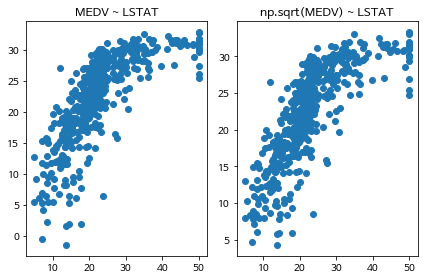

In [45]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, (result11.predict(df_boston))**2)
plt.title("np.sqrt(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show()

In [46]:
model12 = sm.OLS.from_formula("np.log(MEDV) ~ LSTAT", data=df_boston)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          2.23e-116
Time:                        14:57:46   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.0

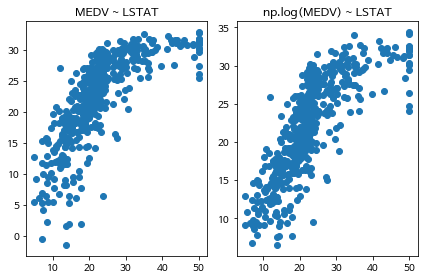

In [47]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result12.predict(df_boston)))
plt.title("np.log(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show()

In [48]:
model13 = sm.OLS.from_formula("np.log(MEDV) ~ np.log(LSTAT)", data=df_boston)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1058.
Date:                Wed, 01 Jun 2022   Prob (F-statistic):          7.32e-126
Time:                        14:58:07   Log-Likelihood:                 21.325
No. Observations:                 506   AIC:                            -38.65
Df Residuals:                     504   BIC:                            -30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3618      0.042    103.603

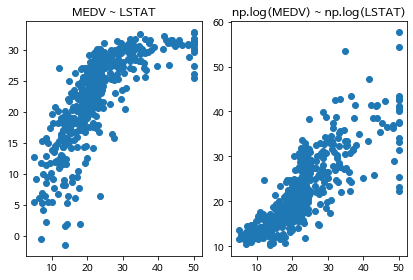

In [49]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result13.predict(df_boston)))
plt.title("np.log(MEDV) ~ np.log(LSTAT)")
plt.tight_layout()
plt.show()